<a href="https://colab.research.google.com/github/shirleysheng/anomaly_detection/blob/master/one_class_svm_interest_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

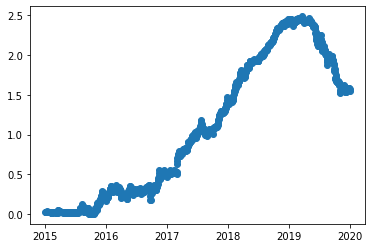

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM 

data = pd.read_csv('/content/IRs.csv',index_col=0)
data.index = pd.to_datetime(data.index)
interest_rate = data.dropna()

feature1 = plt.scatter(interest_rate.index, data.iloc[:,1])



In [0]:
interest_rate.head()

,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2015-01-02,0.02,0.02,0.11,0.25,0.66,1.07,1.61,1.92,2.12,2.41,2.69
2015-01-05,0.02,0.03,0.10,0.26,0.68,1.06,1.57,1.85,2.04,2.32,2.60
2015-01-06,0.02,0.03,0.10,0.25,0.65,1.02,1.50,1.78,1.97,2.25,2.52
2015-01-07,0.02,0.03,0.09,0.25,0.62,1.00,1.47,1.76,1.96,2.25,2.52
2015-01-08,0.01,0.03,0.08,0.23,0.62,1.00,1.50,1.81,2.03,2.33,2.59


In [0]:
test_data = interest_rate['2019'].dropna()
train_data = interest_rate[~interest_rate.isin(test_data)].dropna()



In [0]:
svm = OneClassSVM(kernel='rbf', nu=0.05, gamma=0.0001) 
svm.fit(train_data)
y_pred=svm.predict(test_data)

value, count = np.unique(y_pred, return_counts = True)
outlier = test_data[y_pred == -1]

Text(0, 0.5, '1_year_rate')

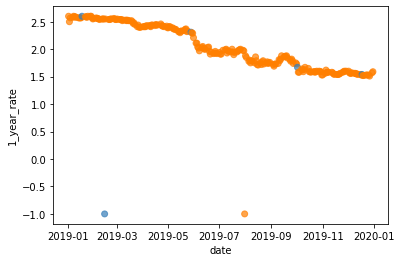

In [0]:
x = test_data.index
y = test_data.iloc[:,3]
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(x, y, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
plt.xlabel('date') 
plt.ylabel('1_year_rate')

In [0]:
outlier


,1 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,
2019-01-18,2.40,2.41,2.50,2.60,2.62,2.60,2.62,2.70,2.79,-1.00,3.09
2019-02-14,2.45,2.43,2.51,-1.00,2.50,2.48,2.48,2.56,2.66,2.85,3.01
2019-05-28,2.35,2.37,2.38,2.31,2.12,-1.00,2.06,2.16,2.26,2.52,2.70
2019-10-02,1.75,1.79,1.75,1.67,1.48,1.43,1.43,1.53,1.60,1.90,-1.00
2019-12-18,1.56,1.56,1.58,1.54,1.63,1.67,1.74,1.86,-1.00,2.22,2.35
